In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df = pd.read_csv('cleaned dataset.csv', index_col='datetime')
df

,main.temp,main.pressure,main.humidity,clouds.all,wind.speed,weather.Clear,weather.Clouds,weather.Rain
datetime,,,,,,,,
2023-11-06 15:45:57,33.36,1010.0,68.0,20.0,4.02,0.0,1.0,0.0
2023-11-06 15:47:35,30.00,1009.0,74.0,81.0,2.06,0.0,1.0,0.0
2023-11-06 15:38:29,33.32,1010.0,66.0,20.0,2.57,0.0,1.0,0.0
2023-11-06 15:39:56,33.33,1010.0,66.0,50.0,0.89,0.0,1.0,0.0
2023-11-06 18:01:20,31.10,1010.0,72.0,20.0,4.12,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-23 21:05:10,26.94,1012.0,88.0,99.0,2.50,0.0,0.0,1.0
2023-11-24 00:01:24,27.12,1012.0,91.0,75.0,1.54,0.0,1.0,0.0
2023-11-24 00:03:06,26.03,1011.0,82.0,55.0,1.90,0.0,1.0,0.0


In [3]:

# Separate features (except temperature) into weather_x
camanava_x = df.drop(columns=['main.temp'])

# Separate temperature column into weather_y
camanava_y = df[['main.temp']]

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_x.shape)
print("Shape of camanava_y:", camanava_y.shape)
#camanava_y.head()


Shape of camanava_x: (420, 7)
Shape of camanava_y: (420, 1)


In [4]:
camanava_x.columns

Index(['main.pressure', 'main.humidity', 'clouds.all', 'wind.speed',
       'weather.Clear', 'weather.Clouds', 'weather.Rain'],
      dtype='object')

Index(['main.pressure', 'main.humidity', 'clouds.all', 'wind.speed',
       'weather.Clear', 'weather.Clouds', 'weather.Rain'],
      dtype='object')


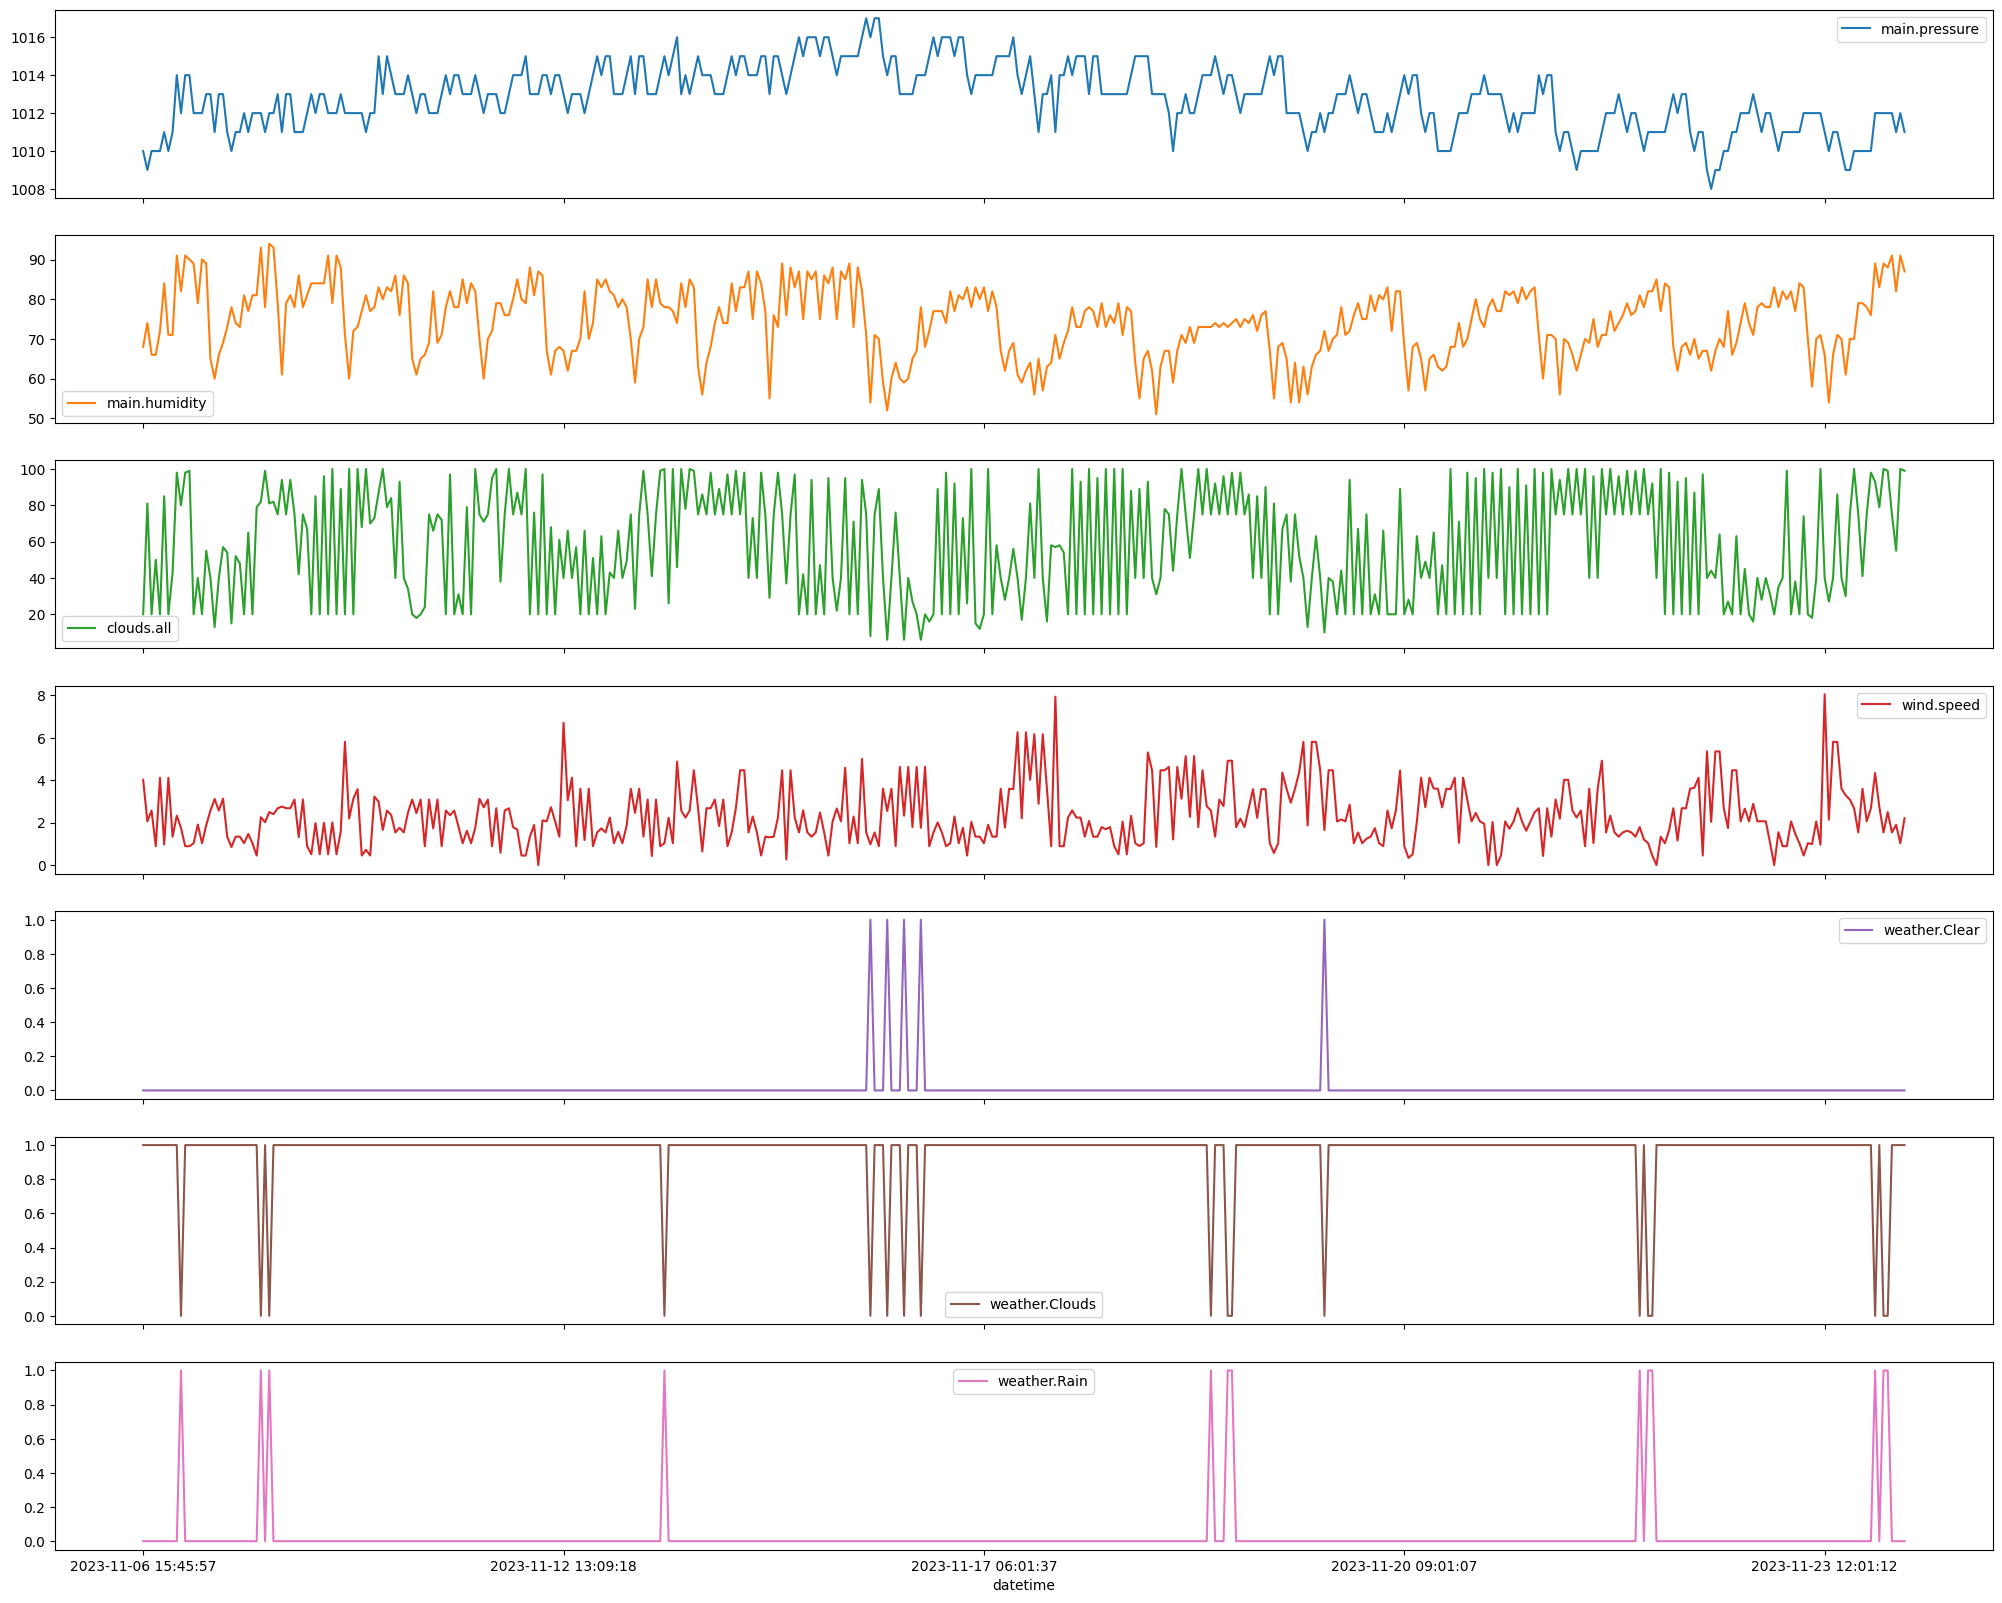

In [5]:
import matplotlib.pyplot as plt
camanava_xnum = camanava_x.apply(pd.to_numeric, errors='ignore')
# Select only numerical features 
camanava_features = camanava_xnum .select_dtypes(include=['float64', 'int64'])
print(camanava_features.columns)
# Plot all features in separate subplots
camanava_features .plot(subplots=True, figsize=(25, 20))
plt.show()


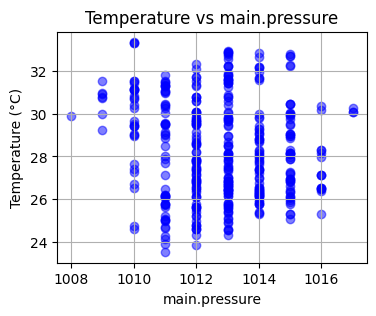

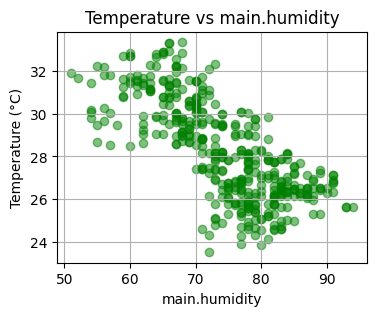

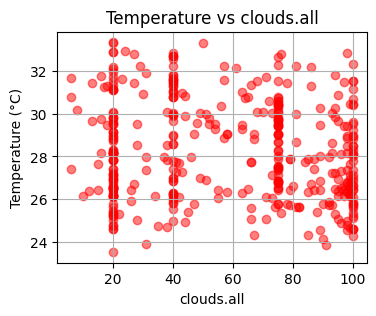

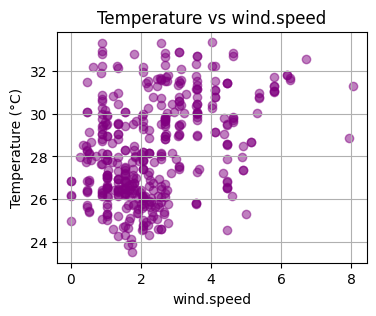

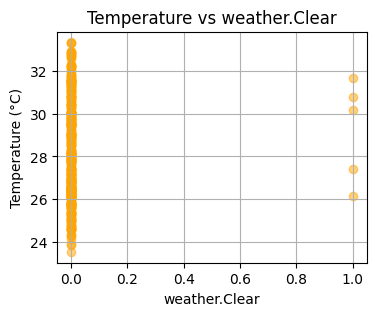

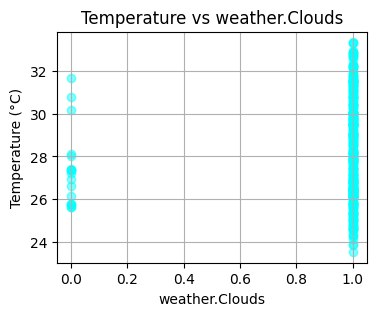

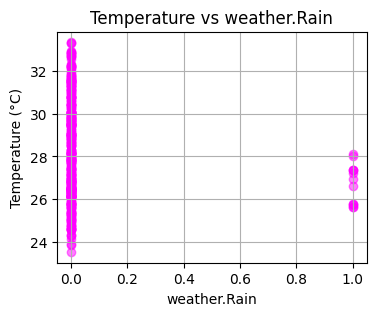

In [6]:
import matplotlib.pyplot as plt

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta']

# Create a scatter plot for each feature against temperature
for i, feature in enumerate(camanava_x.columns):
    plt.figure(figsize=(4, 3))
    plt.scatter(camanava_x[feature], camanava_y.values, alpha=0.5, color=colors[i])
    plt.title(f'Temperature vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Temperature (°C)')
    plt.grid(True)
    plt.show()


# Multiple Linear Regression

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(camanava_x, camanava_y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)



In [7]:
# Splitting based on temporal data 
import pandas as pd
from sklearn.linear_model import LinearRegression

datasplit = int(len(camanava_x) * 0.8)

# Split the features
X_train = camanava_x[:datasplit]
X_test = camanava_x[datasplit:]

# Split the target variable
y_train = camanava_y[:datasplit]
y_test = camanava_y[datasplit:]

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)



In [8]:
print("Shape of y_test:", y_test.shape)
print("Shape of y_pred:", y_pred.shape)


Shape of y_test: (84, 1)
Shape of y_pred: (84, 1)


In [9]:
#  Actual and Predicted values along with their differences
results1 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred.flatten(), 
    'Difference': (y_test.values - y_pred).flatten()
    })
print("Actual vs Predicted:")
results1.index = X_test.index  
results1


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-21 12:01:04,30.35,29.160941,1.189059
2023-11-21 12:02:41,30.27,31.525970,-1.255970
2023-11-21 12:03:02,30.29,29.309177,0.980823
2023-11-21 12:04:31,30.41,29.369833,1.040167
2023-11-21 15:01:10,30.41,29.823711,0.586289
...,...,...,...
2023-11-23 21:05:10,26.94,25.543913,1.396087
2023-11-24 00:01:24,27.12,25.009741,2.110259
2023-11-24 00:03:06,26.03,26.841854,-0.811854


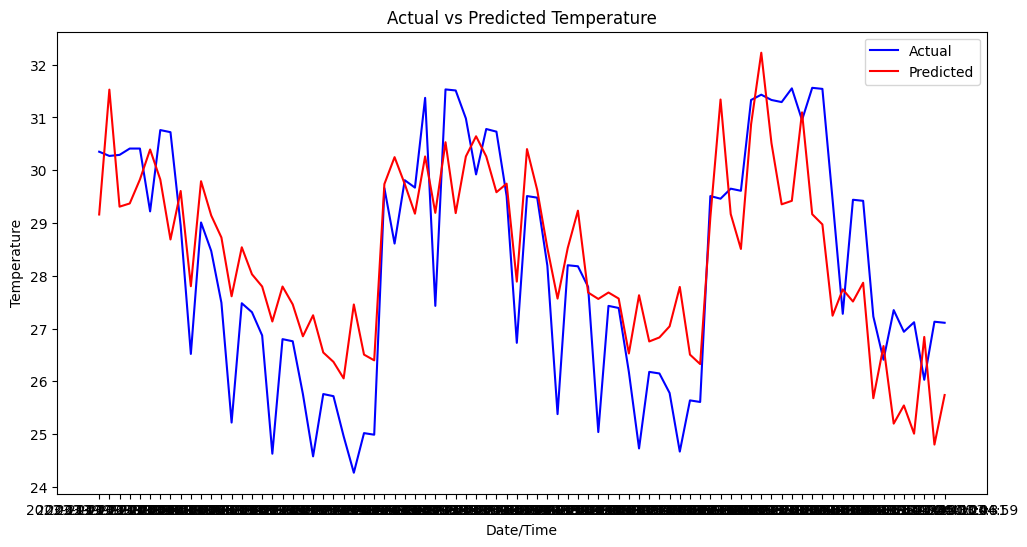

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(results1.index, results1['Actual'], color='blue', label='Actual')
plt.plot(results1.index, results1['Predicted'], color='red', label='Predicted')


plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()


plt.show()


In [11]:
# Calculate the mean squared error of the predictions
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 2.026288823672974


# Decision Tree Regression

In [12]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=0)

In [13]:
import numpy as np
y_pred2=regressor.predict(X_test)
y_pred2

array([30.61 , 30.02 , 31.11 , 29.54 , 33.33 , 29.04 , 33.33 , 24.61 ,
       30.475, 29.52 , 33.36 , 29.54 , 30.075, 25.68 , 26.17 , 27.97 ,
       29.52 , 23.85 , 29.52 , 23.85 , 26.62 , 27.71 , 27.71 , 28.   ,
       28.135, 23.85 , 25.22 , 23.85 , 28.75 , 29.04 , 28.75 , 27.415,
       31.03 , 30.475, 30.795, 28.48 , 33.36 , 29.04 , 33.36 , 28.88 ,
       33.36 , 26.15 , 31.03 , 28.88 , 27.81 , 24.6  , 27.81 , 27.415,
       25.68 , 25.68 , 25.68 , 27.83 , 25.42 , 26.49 , 25.05 , 27.66 ,
       25.68 , 26.49 , 25.22 , 27.87 , 30.96 , 29.65 , 28.96 , 24.61 ,
       31.03 , 30.1  , 31.03 , 28.88 , 30.475, 30.84 , 30.61 , 29.54 ,
       24.11 , 25.84 , 25.68 , 26.1  , 26.51 , 27.525, 23.85 , 24.61 ,
       24.32 , 26.35 , 27.76 , 25.62 ])

In [14]:
import pandas as pd

# Calculate the differences between actual and predicted values
differences = y_test.values.flatten() - y_pred2.flatten()

# Create a DataFrame with actual, predicted values, and their differences
results2 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred2.flatten(), 
    'Difference': differences
})

# Print the DataFrame
print("Actual vs Predicted:")
results2.index = X_test.index
results2


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-21 12:01:04,30.35,30.61,-0.26
2023-11-21 12:02:41,30.27,30.02,0.25
2023-11-21 12:03:02,30.29,31.11,-0.82
2023-11-21 12:04:31,30.41,29.54,0.87
2023-11-21 15:01:10,30.41,33.33,-2.92
...,...,...,...
2023-11-23 21:05:10,26.94,24.61,2.33
2023-11-24 00:01:24,27.12,24.32,2.80
2023-11-24 00:03:06,26.03,26.35,-0.32


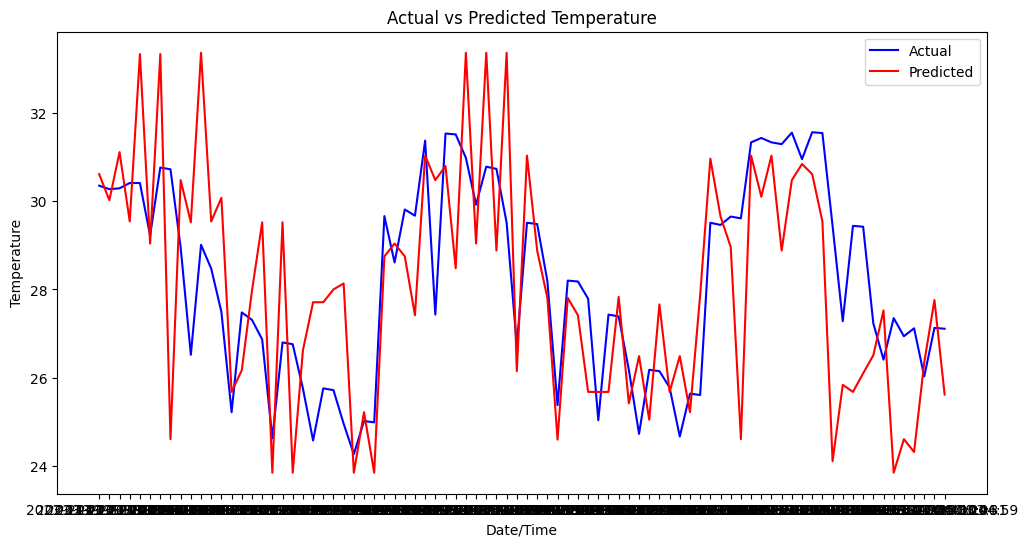

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(results2.index, results2['Actual'], color='blue', label='Actual')
plt.plot(results2.index, results2['Predicted'], color='red', label='Predicted')


plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()


plt.show()


In [17]:
mse = mean_squared_error(y_test, y_pred2)

print("Decision Tree Regression - Mean Squared Error:", mse)

Decision Tree Regression - Mean Squared Error: 4.313493154761905


# Random Forest Regression

In [18]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor = RandomForestRegressor(random_state=0)
random_forest_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred3 = random_forest_regressor.predict(X_test)


In [19]:
import pandas as pd

# Calculate the differences between actual and predicted values
differences = y_test.values.flatten() - y_pred3.flatten()

# Create a DataFrame with actual, predicted values, and their differences
results3 = pd.DataFrame({
    'Actual': y_test.values.flatten(), 
    'Predicted': y_pred3.flatten(), 
    'Difference': differences
})

# Print the DataFrame
print("Actual vs Predicted:")
results3.index = X_test.index
results3


Actual vs Predicted:


,Actual,Predicted,Difference
datetime,,,
2023-11-21 12:01:04,30.35,30.693833,-0.343833
2023-11-21 12:02:41,30.27,30.602500,-0.332500
2023-11-21 12:03:02,30.29,30.313072,-0.023072
2023-11-21 12:04:31,30.41,29.717367,0.692633
2023-11-21 15:01:10,30.41,31.802400,-1.392400
...,...,...,...
2023-11-23 21:05:10,26.94,25.562500,1.377500
2023-11-24 00:01:24,27.12,26.314050,0.805950
2023-11-24 00:03:06,26.03,25.750730,0.279270


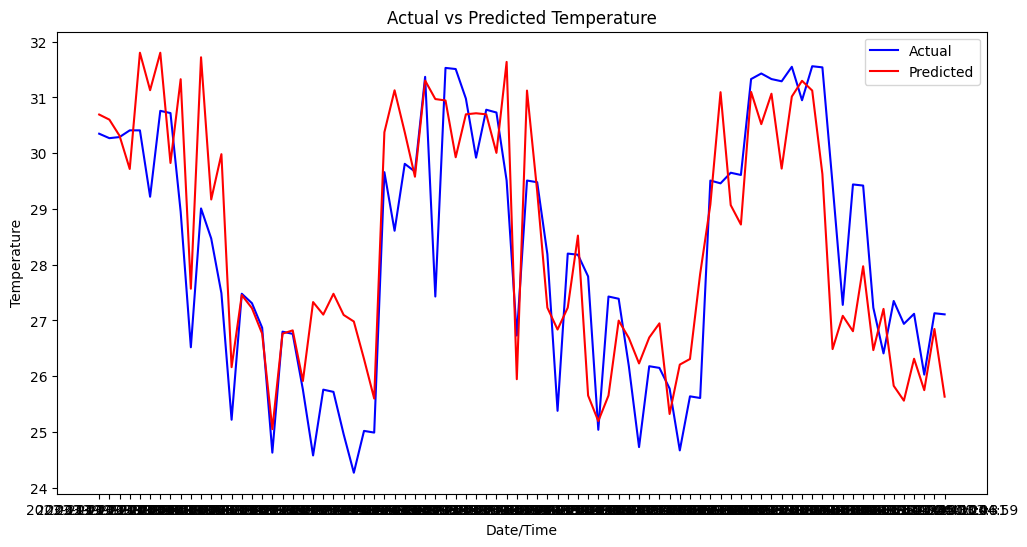

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))


plt.plot(results1.index, results3['Actual'], color='blue', label='Actual')
plt.plot(results1.index, results3['Predicted'], color='red', label='Predicted')


plt.xlabel('Date/Time')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()


plt.show()


In [21]:
mse = mean_squared_error(y_test, y_pred3)

print("Random Tree Regression - Mean Squared Error:", mse)

Random Tree Regression - Mean Squared Error: 1.7782247789408498


In [23]:

# Separate features (except temperature) into weather_x
camanava_X= df [['main.humidity']]

# Separate temperature column into weather_y
camanava_Y = df[['main.temp']]

# Display the shapes of the new DataFrames
print("Shape of camanava_x:", camanava_X.shape)
print("Shape of camanava_y:", camanava_Y.shape)
#camanava_y.head()


Shape of camanava_x: (420, 1)
Shape of camanava_y: (420, 1)


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(camanava_X,  camanava_Y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)



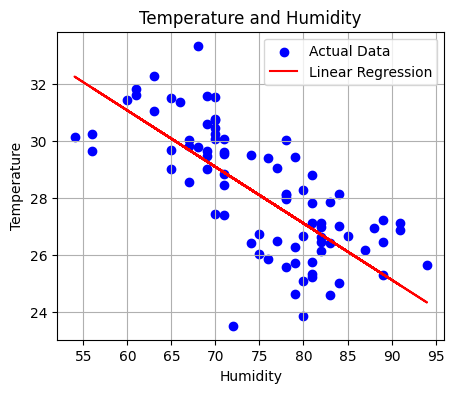

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Linear Regression')
plt.title("Temperature and Humidity")
plt.xlabel('Humidity')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()
